In [24]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from cosinorage.dataloaders import AccelerometerDataLoader, ENMODataLoader

In [25]:
reload = False

## Accelerometer Data Loading

In [26]:
if reload:
    acc_loader = AccelerometerDataLoader(input_dir_path='../data/62164/')
    acc_loader.load_data()
    with open("acc_loader.pkl", "wb") as file:
        pickle.dump(acc_loader, file)

In [27]:
if not reload:
    with open("acc_loader.pkl", "rb") as file:
        acc_loader = pickle.load(file)

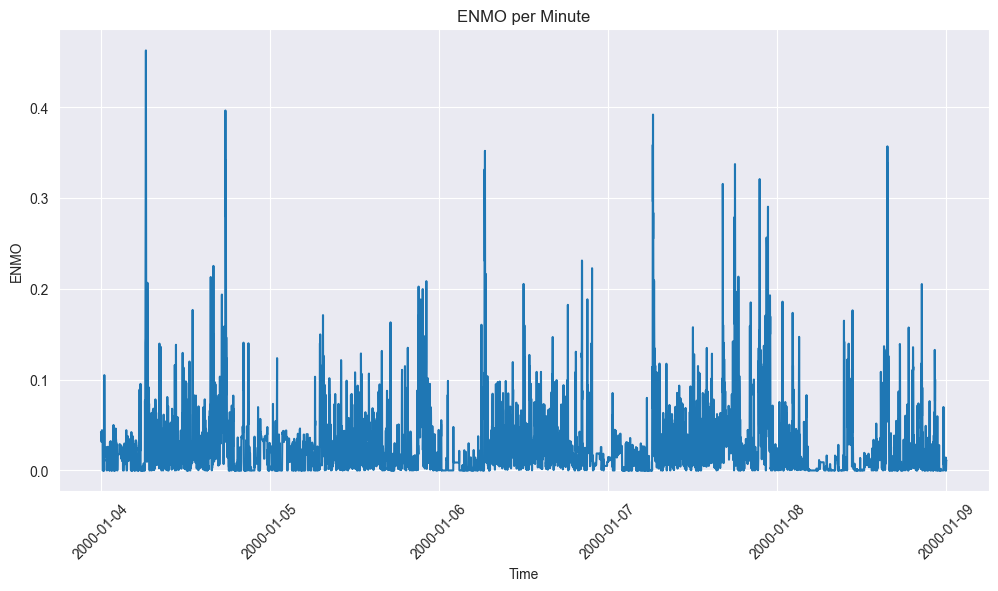

In [28]:
acc_loader.plot_enmo()

## ENMO Data Loading

In [29]:
if reload:
    enmo_loader = ENMODataLoader(input_file_path='../data/62164.csv')
    enmo_loader.load_data()
    with open("enmo_loader.pkl", "wb") as file:
        pickle.dump(enmo_loader, file)

In [30]:
if not reload:
    with open("enmo_loader.pkl", "rb") as file:
        enmo_loader = pickle.load(file)

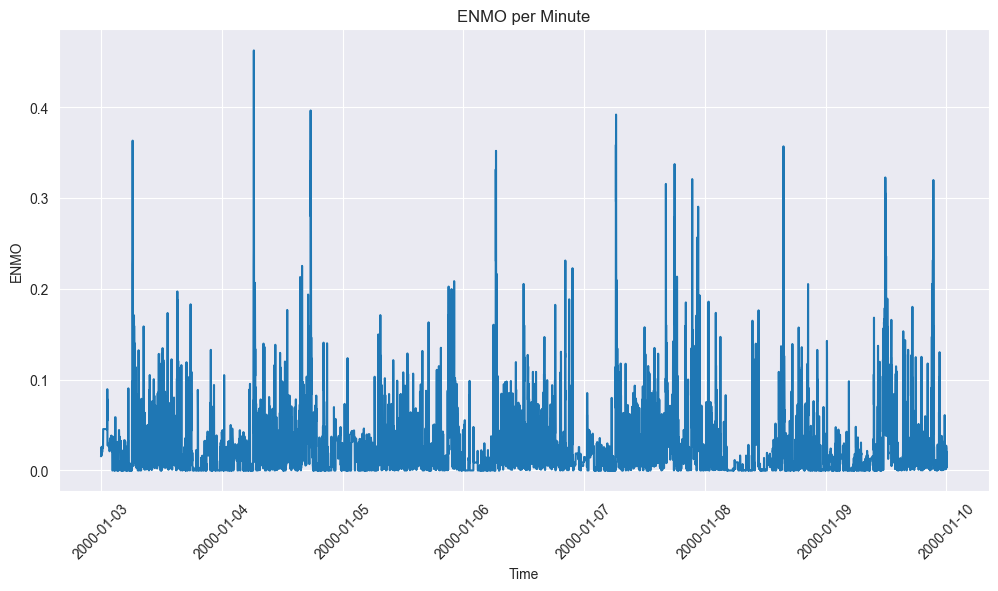

In [31]:
enmo_loader.plot_enmo()

## ENMO Difference between Accelerometer and ENMO DataLoader

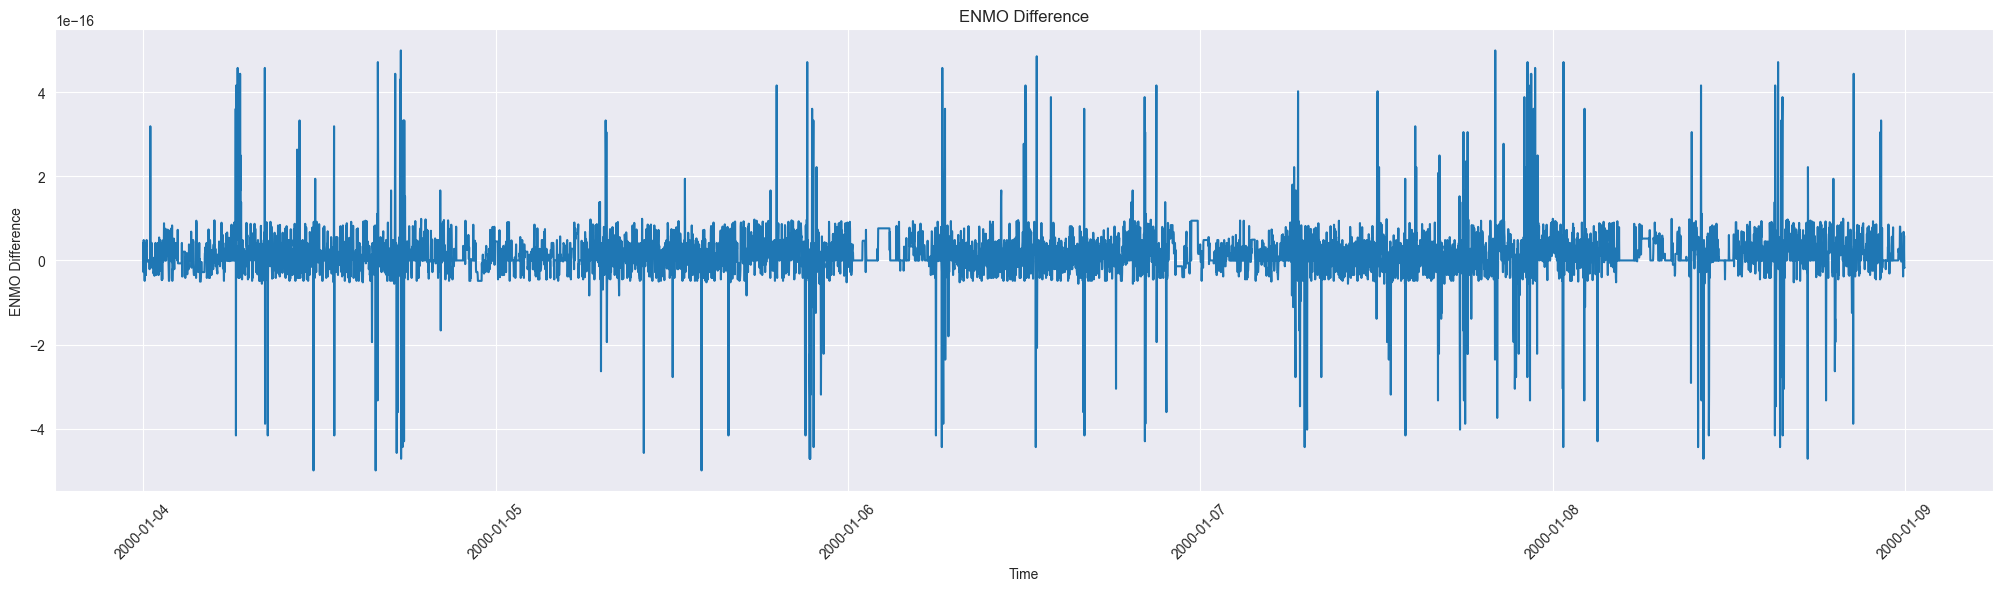

In [32]:
df1 = acc_loader.get_enmo_per_minute()
df2 = enmo_loader.get_enmo_per_minute()

start_date = max(df1.index[0], df2.index[0])
end_date = min(df1.index[-1], df2.index[-1])

# filter for only the overlapping dates
df1 = df1[(df1.index >= start_date) & (df1.index <= end_date)]
df2 = df2[(df2.index >= start_date) & (df2.index <= end_date)]

diff = df1-df2
diff = diff.reset_index()

plt.figure(figsize=(25, 6))
sns.lineplot(data=diff, x='TIMESTAMP', y='ENMO')
plt.xlabel('Time')
plt.ylabel('ENMO Difference')
plt.title('ENMO Difference')
plt.xticks(rotation=45)
plt.show()

In [33]:
diff.describe()

,TIMESTAMP,ENMO
count,7200,7.200000e+03
mean,2000-01-06 11:59:29.999999872,1.370056e-17
min,2000-01-04 00:00:00,-4.996004e-16
25%,2000-01-05 05:59:45,-6.938894e-18
50%,2000-01-06 11:59:30,8.131516e-18
75%,2000-01-07 17:59:15,3.989864e-17
max,2000-01-08 23:59:00,4.996004e-16
std,NaN,6.741358e-17


In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=diff["TIMESTAMP"], y=diff["ENMO"], mode="lines", name="ENMO Difference"))

fig.update_layout(
    title="Interactive ENMO Difference Over Time",
    xaxis_title="Time",
    yaxis_title="ENMO Difference",
    xaxis=dict(rangeslider=dict(visible=True)),  # Adds a range slider for zooming
)

fig.show()